In [1]:
import matplotlib.pyplot as plt
import random
from itertools import count
from matplotlib.animation import FuncAnimation

# Use the notebook magic command for interactive plots
%matplotlib notebook

In [2]:
plt.style.use("fivethirtyeight")

In [3]:
x_vals = [0, 1, 2, 3, 4, 5]
y_vals = [0, 1, 3, 2, 3, 5]

<IPython.core.display.Javascript object>


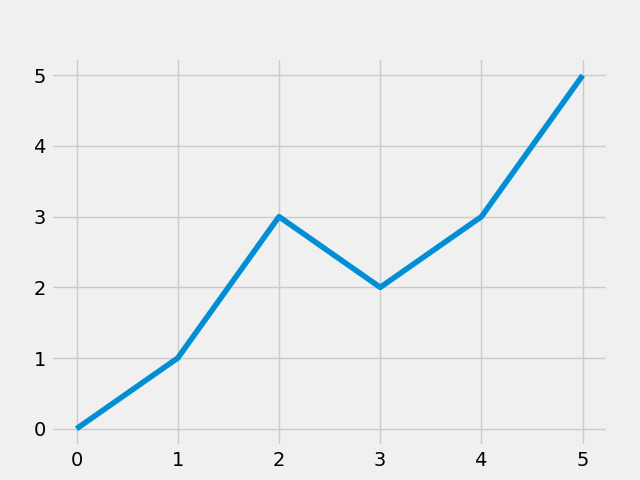

In [4]:
plt.plot(x_vals, y_vals)

<IPython.core.display.Javascript object>


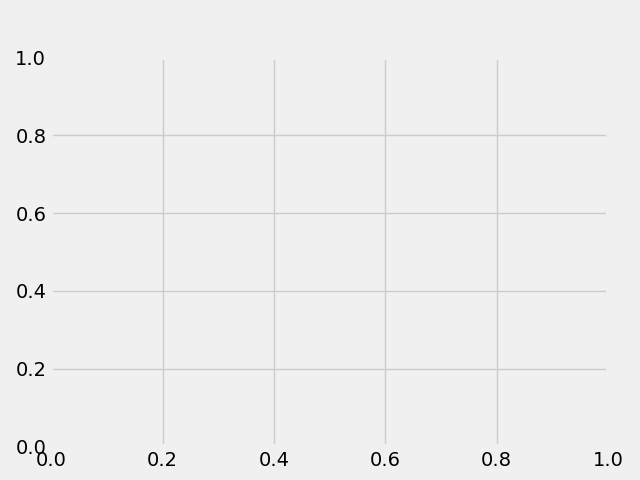

In [5]:
# Initialize empty lists to store the x and y values
x_vals = []
y_vals = []

# Create an index iterator
index = count()

# Create a figure and axis
fig, ax = plt.subplots()

def animate(i):
    x_vals.append(next(index))
    y_vals.append(random.randint(0, 5))
    
    # Clear the axis
    ax.cla()
    
    # Plot the new data
    ax.plot(x_vals, y_vals)
    
    # Tight layout to prevent overlap
    plt.tight_layout()

# Create the animation with cache_frame_data set to False
ani = FuncAnimation(fig, animate, interval=1000, cache_frame_data=False)

# Show the plot
plt.show()


### Part 2: importing Csv file

In [6]:
import csv
import random
import time

In [7]:
fieldnames = ["x_value", "total_1", "total_2"]

In [8]:
import csv
import random
import time
import threading

def write_data():
    # Initialize variables
    x_value = 0
    total_1 = 1000
    total_2 = 1000

    # Define the fieldnames for the CSV
    fieldnames = ["x_value", "total_1", "total_2"]

    # Create and write the header of the CSV file
    with open("mydata.csv", "w", newline='') as csv_file:
        csv_writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
        csv_writer.writeheader()

    # Continuously write data to the CSV file
    while True:
        with open("mydata.csv", "a", newline='') as csv_file:
            csv_writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
            
            # Create the info dictionary
            info = {
                "x_value": x_value,
                "total_1": total_1,
                "total_2": total_2
            }

            # Write the dictionary to the CSV file
            csv_writer.writerow(info)
            print(x_value, total_1, total_2)
            
            # Update the values
            x_value += 1
            total_1 += random.randint(-6, 8)
            total_2 += random.randint(-5, 6)
            
            # Sleep for 1 second
            time.sleep(1)

# Run the data writing in a separate thread
threading.Thread(target=write_data, daemon=True).start()


<IPython.core.display.Javascript object>


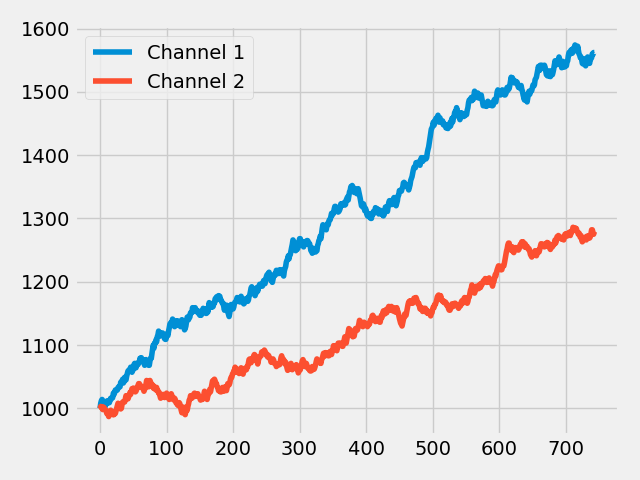

732 1553 1272


C:\Users\Dell\AppData\Local\Temp\ipykernel_11436\3056732859.py:31: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = FuncAnimation(fig, animate, interval=1000)


In [10]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.animation import FuncAnimation

# Create a figure and an axis
fig, ax = plt.subplots()

def animate(i):
    try:
        data = pd.read_csv("mydata.csv")
        x = data["x_value"]
        y1 = data["total_1"]
        y2 = data["total_2"]
        
        # Clear the axis
        ax.clear()
        
        # Plot the new data
        ax.plot(x, y1, label="Channel 1")
        ax.plot(x, y2, label="Channel 2")
        
        # Add legend
        ax.legend(loc="upper left")
        
        # Tight layout to prevent overlap
        plt.tight_layout()
    except Exception as e:
        print(f"Error reading or plotting data: {e}")

# Create the animation
ani = FuncAnimation(fig, animate, interval=1000)

# Show the plot
plt.show()
